In [ ]:
# import random

# def rand():
#     for i in range(100):
#         print(random.randrange(1,100))
# rand()

import random

def coin_toss():
    heads_count = 0
    tosses = 100

    for _ in range(tosses):
        result = random.choice(["Head", "Tail"])
        if result == "Head":
            heads_count += 1

    return heads_count

# Simulate coin tosses
num_heads = coin_toss()

# Display the number of times "Head" occurs
print("Number of heads:", num_heads)


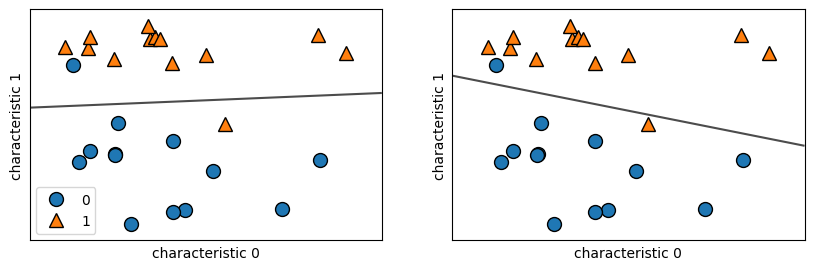

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
import mglearn
import matplotlib.pyplot as plt

X,y = mglearn.datasets.make_forge()
fig, axes = plt.subplots(1,2, figsize=(10,3))

for model, ax in zip([LinearSVC(max_iter=5000), LogisticRegression()], axes):
    clf = model.fit(X,y)
    mglearn.plots.plot_2d_separator(clf,X,fill=False, eps=0.5, ax=ax, alpha=.7)
    mglearn.discrete_scatter(X[:,0], X[:,1], y, ax=ax)
    ax.set_xlabel("characteristic 0")
    ax.set_ylabel("characteristic 1")
axes[0].legend()
    

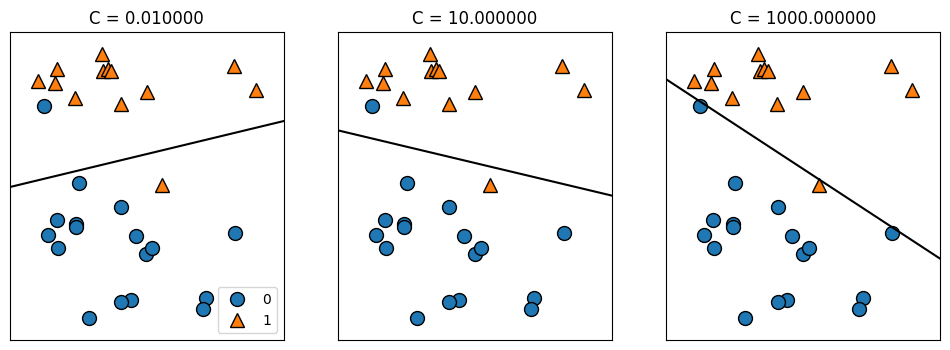

In [4]:
mglearn.plots.plot_linear_svc_regularization()

In [ ]:
def isAlpha(L):
 for i in range(len(L) - 1):
    if L[i] > L[i + 1]:
        return False
 return True

def isAlphaRecursion(L):
    if len(L) <= 1:
        return True
    elif L[0] <= L[1]:
        return isAlphaRecursion(L[1:])
    else:
        return False
    

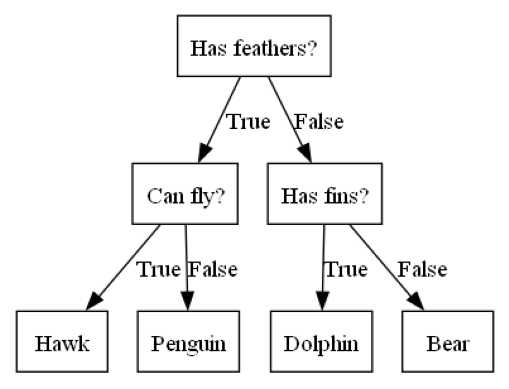

In [8]:
mglearn.plots.plot_animal_tree()

In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42)
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
print("훈련 세트 정확도: {:.3f}".format(tree.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(tree.score(X_test, y_test)))


훈련 세트 정확도: 1.000
테스트 세트 정확도: 0.937


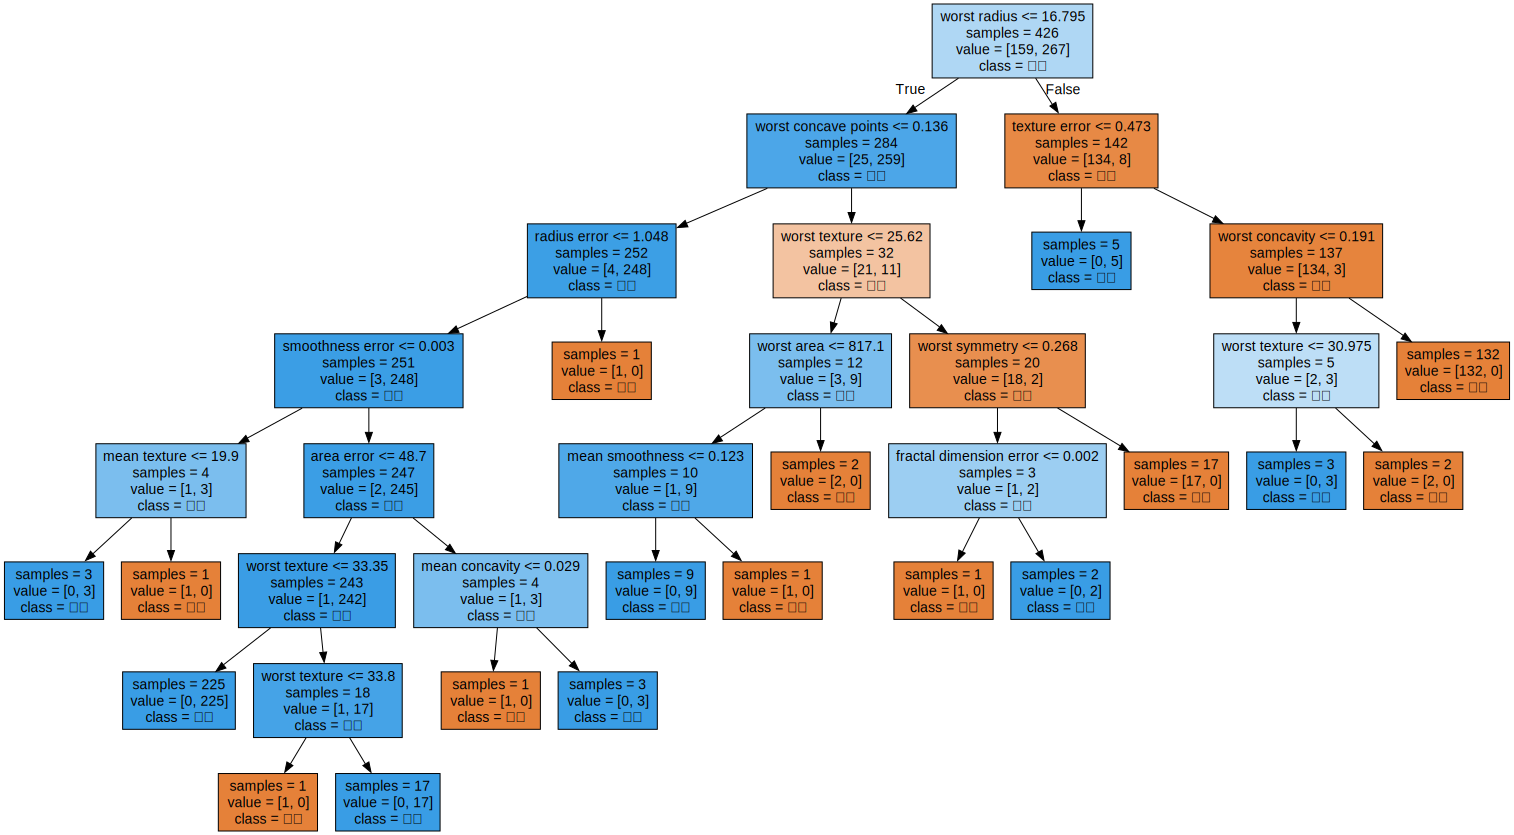

In [3]:
from sklearn.tree import export_graphviz
import graphviz

export_graphviz(tree, out_file="tree.dot", class_names=["악성", "양성"],
                feature_names=cancer.feature_names, impurity=False, filled=True)
with open("tree.dot", encoding="utf-8") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [3]:
print("특성 중요도 \n", tree.feature_importances_)

특성 중요도 
 [0.         0.00752597 0.         0.         0.00903116 0.
 0.00752597 0.         0.         0.         0.00975731 0.04630969
 0.         0.00238745 0.00231135 0.         0.         0.
 0.         0.00668975 0.69546322 0.05383211 0.         0.01354675
 0.         0.         0.01740312 0.11684357 0.01137258 0.        ]


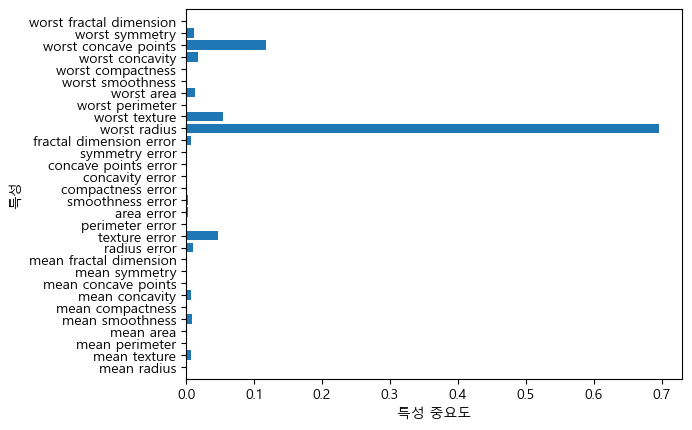

In [18]:
import numpy as np
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    # 폰트 설정
    plt.rcParams['font.family'] = 'Malgun Gothic'
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("특성 중요도")
    plt.ylabel("특성")
    plt.ylim(-1, n_features)
plot_feature_importances_cancer(tree)

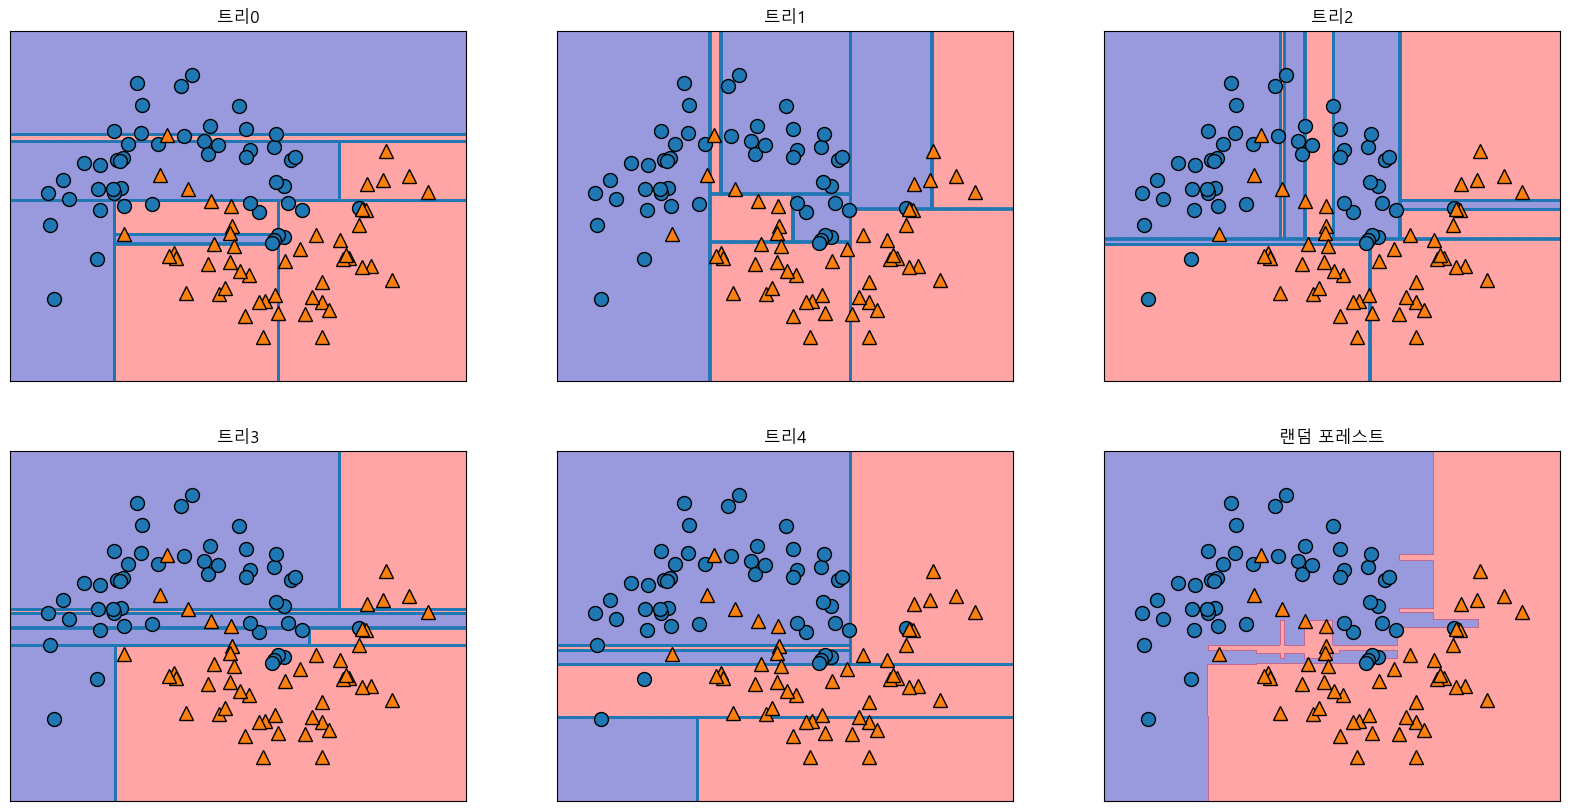

In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons

X,y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X,y,stratify=y, random_state=42)
forest = RandomForestClassifier(n_estimators=5, random_state=2)
forest.fit(X_train, y_train)
plt.rcParams['font.family'] = 'Malgun Gothic'
fig, axes = plt.subplots(2,3,figsize=(20,10))
for i,(ax,tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    ax.set_title("트리{}".format(i))
    mglearn.plots.plot_tree_partition(X,y,tree,ax=ax)
mglearn.plots.plot_2d_separator(forest, X,fill=True, ax=axes[-1,-1], alpha=.4)
axes[-1,-1].set_title("랜덤 포레스트")
mglearn.discrete_scatter(X[:,0],X[:, 1],y)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)
forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)

print("훈련 세트 정확도 : {:.3f}".format(forest.score(X_train, y_train)))
print("테스트 세트 정확도 : {:.3f}".format(forest.score(X_test, y_test)))


훈련 세트 정확도 : 1.000
테스트 세트 정확도 : 0.972


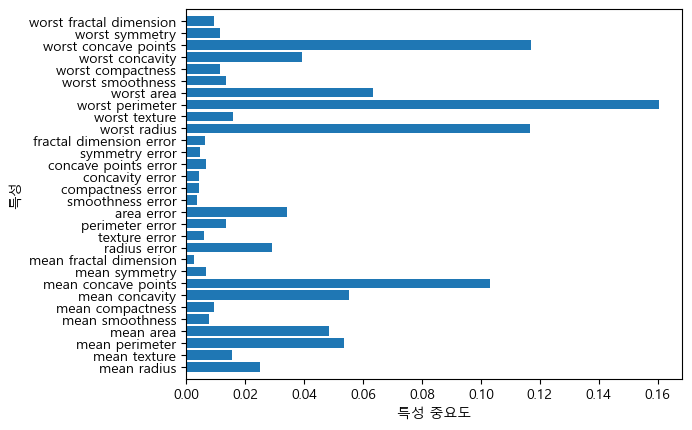

In [19]:
plot_feature_importances_cancer(forest)

In [20]:
from sklearn.ensemble import GradientBoostingClassifier

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)
gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)

print("훈련 세트 정확도 : {:.3f}".format(forest.score(X_train, y_train)))
print("테스트 세트 정확도 : {:.3f}".format(forest.score(X_test, y_test)))

훈련 세트 정확도 : 1.000
테스트 세트 정확도 : 0.972


In [ ]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)

gbrt = GradientBoostingClassifier(random_state=0, learning_rate=0.01)
gbrt.fit(X_train, y_train)


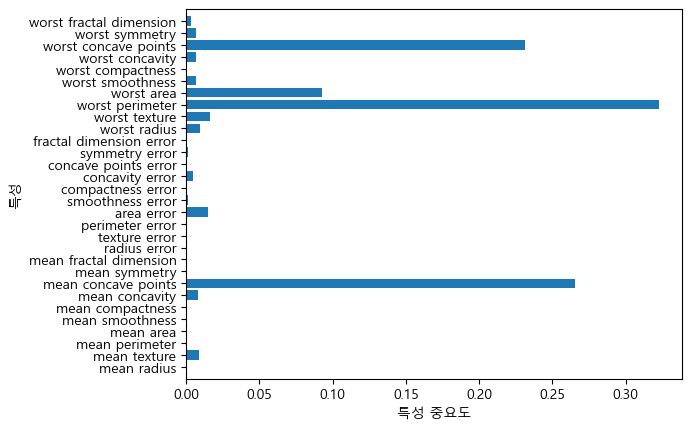

In [21]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)

plot_feature_importances_cancer(gbrt)